# House Prices

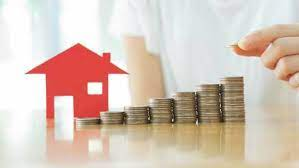

O objetivo desse projeto de estudos é conseguir predizer o valor das casas a partir de várias variáveis que estão disponibilizadas no dataset. 

## Variáveis Relevantes 

- SalePrice: Precço que a casa foi vendido
- MSSubClass: Tipo de casa
- MSZoning: Zona em que a casa foi construida
- LotArea: Área do lote 
- Street: Tipo de rua de acesso
- Lotshape: Tamanho do lote 
- Utilities: Tipos de serviços disponibilizados
- LotConfig: Configuração do lote
- Bedroom: Quantidade de quartos 
- Kitchen: Quantidade de cozinhas 
- Functional: Classificação da funcionalidade da casa 
- OverallQual: Classifica o material geral e o acabamento da casa

Temos outras variáveis, mas ficaria contraprodutivo listar todas aqui. Por isso, listei as que achei principais para o problema. 

## Carregamento dos dados

In [43]:
# Bibliotecas 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Pacote Scikit-Learn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Configurações do Matplotlib
plt.style.use('seaborn-dark-palette')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['lines.linewidth'] = 2

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Visualização do Dados

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Resumo Estatístico

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Análise Exploratória de Dados

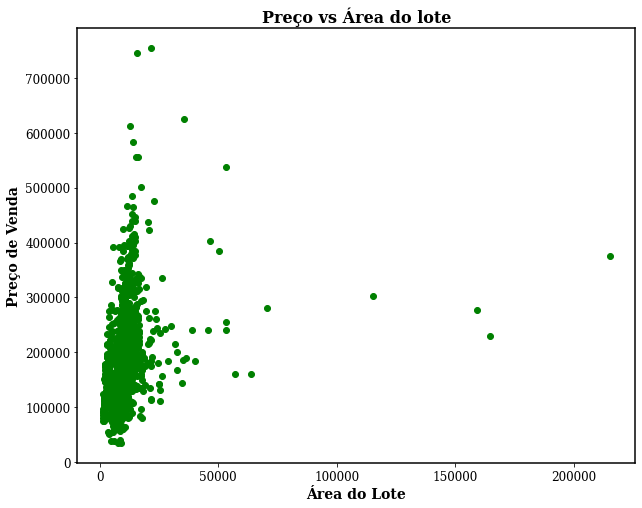

In [9]:
plt.scatter(train['LotArea'], train['SalePrice'], c='green')
plt.xlabel('Área do Lote', fontweight = 'bold')
plt.ylabel('Preço de Venda', fontweight = 'bold')
plt.title('Preço vs Área do lote', fontsize=16, fontweight='bold')
plt.show()

Observamos claramente que a área do lote não afeta tanto o valor da casa.

In [10]:
train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Quantidade de Banheiros')

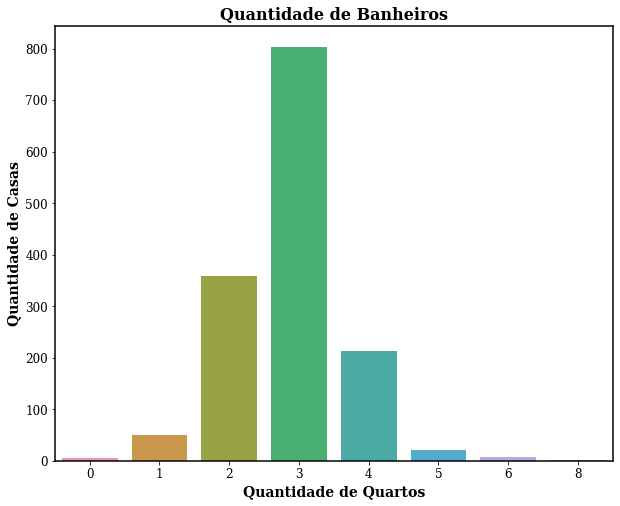

In [11]:
sns.countplot(train['BedroomAbvGr'])
plt.xlabel('Quantidade de Quartos', fontweight = 'bold')
plt.ylabel('Quantidade de Casas', fontweight = 'bold')
plt.title('Quantidade de Banheiros', fontsize = 16, fontweight = 'bold')

Podemos ver que a maioria das casas tem 3 quartos. Outro ponto importante é que temos mais casas sem quartos do que casas com 8 quartos, que é somente uma.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


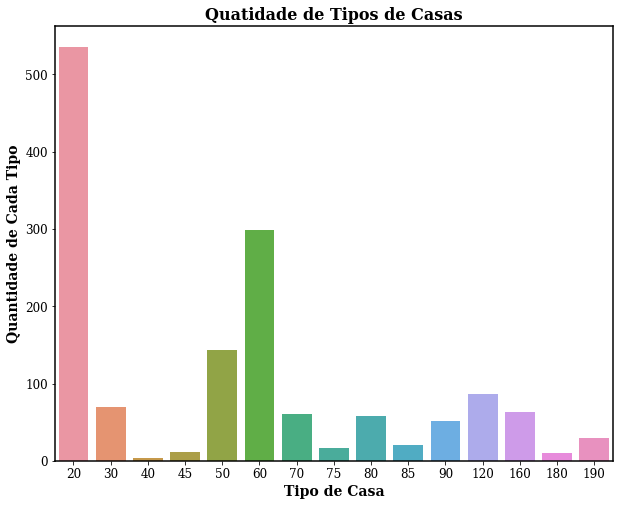

In [12]:
sns.countplot(train['MSSubClass'])
plt.xlabel('Tipo de Casa', fontweight = 'bold')
plt.ylabel('Quantidade de Cada Tipo', fontweight = 'bold')
plt.title('Quatidade de Tipos de Casas', fontsize=16, fontweight='bold')
plt.show()

A maior quantidade das casas é do tipo 20, que são casas de 1945 e mais novas distribuidas em todos os estilos. Agora, queremos ver se há alguma relação entre o tipo de casa e o seu preço de venda.

Text(0.5, 1.0, 'Classe vs Preço')

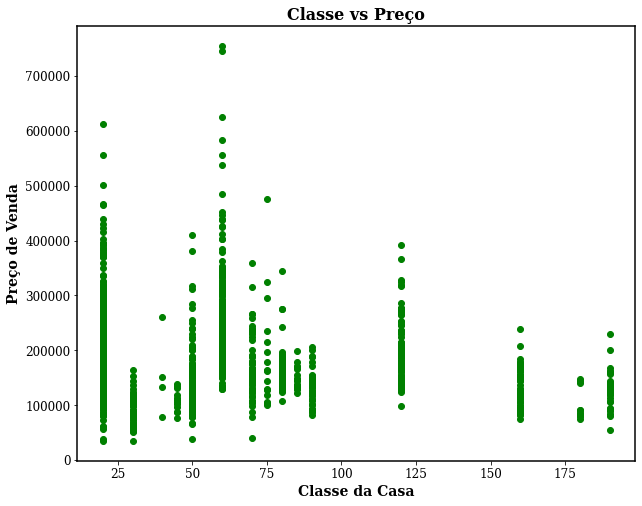

In [13]:
plt.scatter(train['MSSubClass'], train['SalePrice'], c = 'green')
plt.xlabel('Classe da Casa', fontweight = 'bold')
plt.ylabel('Preço de Venda', fontweight = 'bold')
plt.title('Classe vs Preço', fontsize = 16, fontweight = 'bold')

Uma coisa interessante que podemos notar é que casas do tipo 60 tem um valor mínimo de venda maior que os outros tipos e as casas com maior valor são as deste tipo.

Algo que nos ajuda a entender melhor a correlação entre as variáveis é o heatmap de correlações. Assim podemos saber quais gráficos podemos plotar para ver essas correlações. 

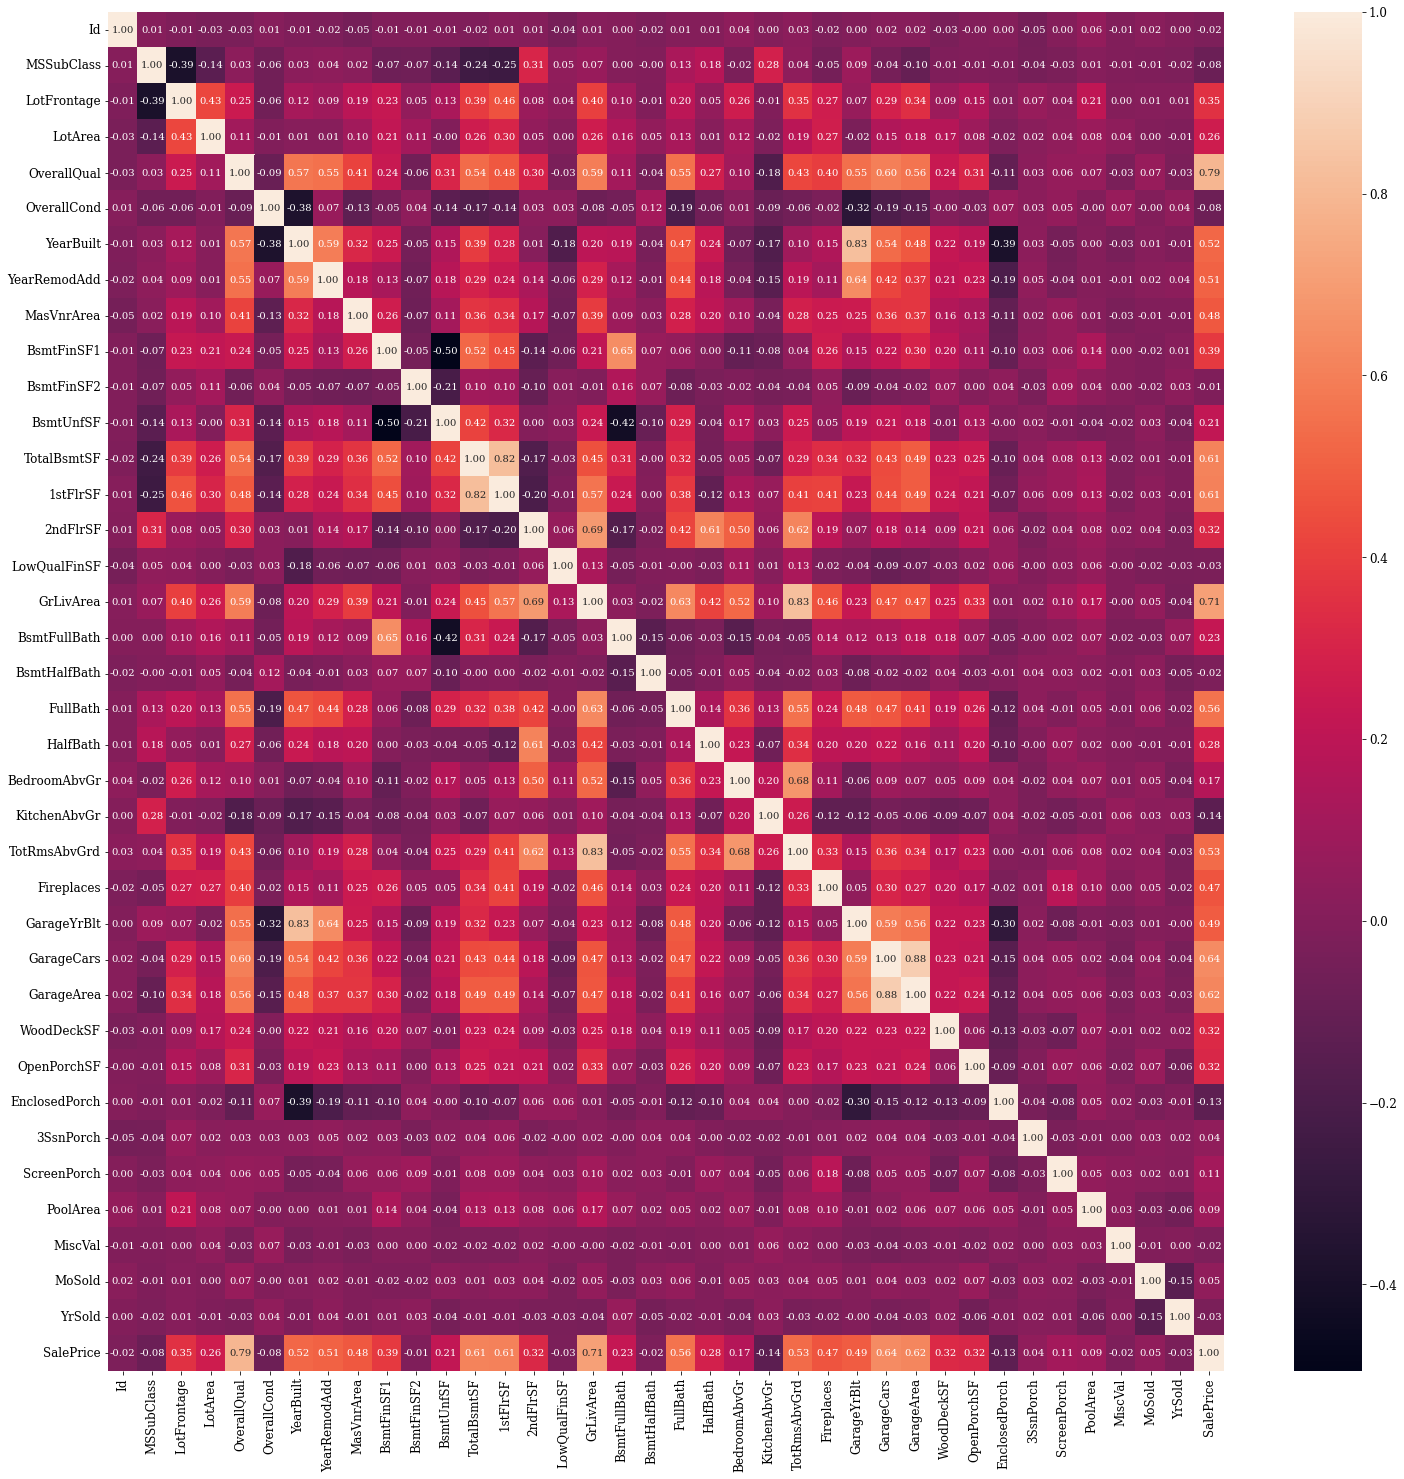

In [14]:
plt.figure(figsize=[25,25])
sns.heatmap(train.corr(), annot=True, fmt='.2f')

Vemos que temos uma correlação forte entre as variáveis GrLivArea (Área da casa que está acima do nível do chão) e preço. Isso faz sentido, pois quanto maior essa área, maior será a área total da casa. 

Podemos vizualizar como essa correlação se comporta.

Text(0.5, 1.0, 'Área Superior da Casa vs Preço de Venda')

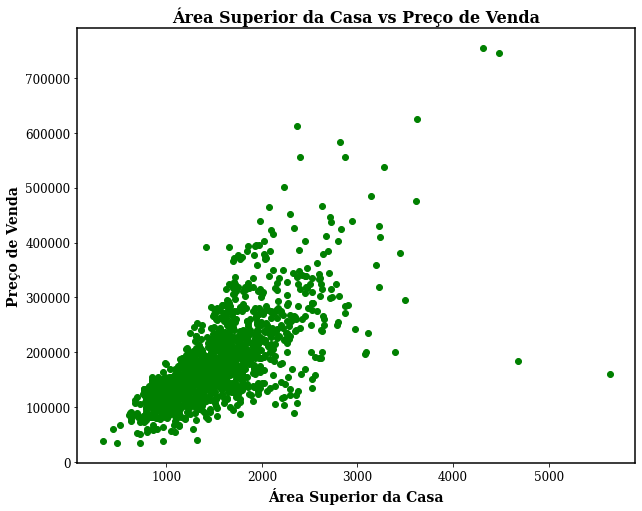

In [15]:
plt.scatter(train['GrLivArea'], train['SalePrice'], c = 'green')
plt.xlabel('Área Superior da Casa', fontweight = 'bold')
plt.ylabel('Preço de Venda', fontweight = 'bold')
plt.title('Área Superior da Casa vs Preço de Venda', fontsize = 16, fontweight = 'bold')

Observamos que é uma correlação praticamente linear entre as variáveis. 

Agora, vamos ver a quantidade de casas em cada zona.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


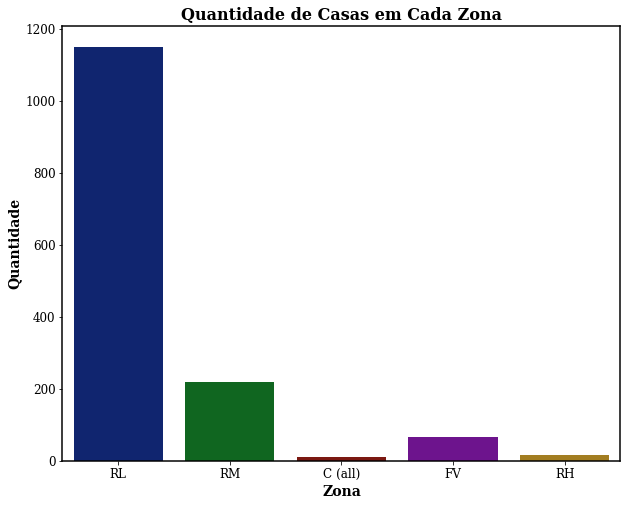

In [16]:
sns.countplot(train['MSZoning'])
plt.xlabel('Zona', fontweight = 'bold')
plt.ylabel('Quantidade', fontweight = 'bold')
plt.title('Quantidade de Casas em Cada Zona', fontsize = 16, fontweight = 'bold')
plt.show()

Vamos verificar o valor médio de venda das casas.

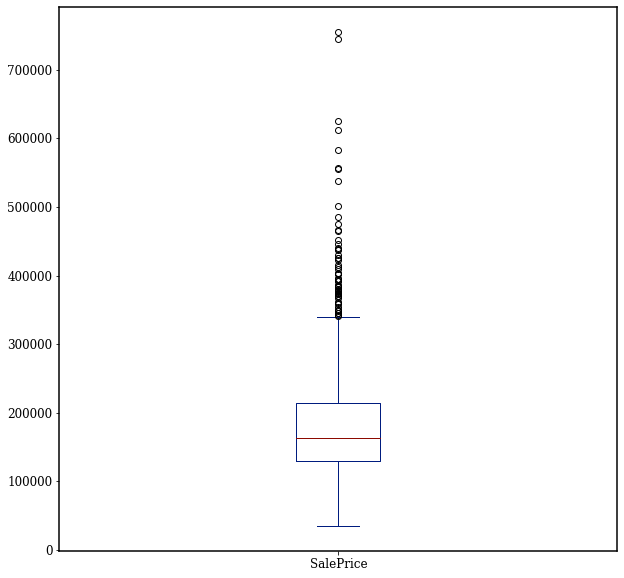

In [17]:
plt.figure(figsize=[10,10])
train['SalePrice'].plot.box()

Outra variável que tem um correlação forte com o preço é a OverallQual, vamos verificar como essa correlação se comporta.

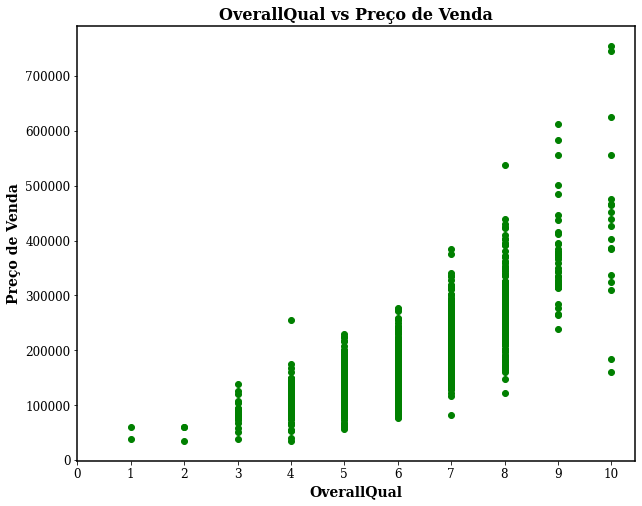

In [18]:
plt.scatter(train['OverallQual'], train['SalePrice'], c = 'green')
plt.xticks(range(11))
plt.xlabel('OverallQual', fontweight = 'bold')
plt.ylabel('Preço de Venda', fontweight = 'bold')
plt.title('OverallQual vs Preço de Venda', fontsize = 16, fontweight = 'bold')
plt.show()

Essa correlação se comporta de maneira linear.

## Análise dos Dado

Primeiro vamos verificar se temos valores faltantes.

In [19]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [20]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

De forma como fizemos não conseguimos indentificar todas as colunas que possuem valores faltante, logo, precisamos encontrar outra forma de achar. Para isso, vamos percorrer todas as colunas e ver quais tem valores faltantes.

In [21]:
for col in train.columns:
  if (train[col].count() < len(train)):
    print(col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Agora temos todas as colunas que possuem dadoss faltantes. Nos dados que são numéricos, vamos substituir os valores faltantes pela média e nas categóricas vamos substituir por None.

In [22]:
# LotFrontage
m = train.LotFrontage.mean()
train['LotFrontage'].fillna(value = m, inplace = True)

# Alley
train['Alley'].fillna(value='None', inplace=True)

# MasVnrType
train['MasVnrType'].fillna(value='None', inplace=True)

# MasVnrArea
m = train['MasVnrArea'].mean()
train['MasVnrArea'].fillna(value=m, inplace=True)

# BsmtQual
train['BsmtQual'].fillna(value='None', inplace=True)

# BsmtCond
train['BsmtCond'].fillna(value='None', inplace=True)

# BsmtExposure
train['BsmtExposure'].fillna(value='None', inplace=True)

# BsmtFinType1
train['BsmtFinType1'].fillna(value='None', inplace=True)

# BsmtFinType2
train['BsmtFinType2'].fillna(value='None', inplace=True)

# Electrical
train['Electrical'].fillna(value='None', inplace=True)

# FireplaceQu
train['FireplaceQu'].fillna(value='None', inplace=True)

# GarageType
train['GarageType'].fillna(value='None', inplace=True)

# GarageYrBlt
m = train['GarageYrBlt'].mean()
train['GarageYrBlt'].fillna(value=m, inplace=True)

# GarageFinish
train['GarageFinish'].fillna(value='None', inplace=True)

# GarageQual
train['GarageQual'].fillna(value='None', inplace=True)

# GarageCond
train['GarageCond'].fillna(value='None', inplace=True)

# PoolQC
train['PoolQC'].fillna(value='None', inplace=True)

# Fence
train['Fence'].fillna(value='None', inplace=True)

# MiscFeature
train['MiscFeature'].fillna(value='None', inplace=True)

In [23]:
# Checando se deu certo

for col in train.columns:
  if (train[col].count() < len(train)):
    print(col)

Como não tivemos nenhuma saída, deu certo.

No nosso dataset temos o id de cada venda, que não será util para prever o preço das casas, logo, vamos retirar essa coluna.

In [24]:
train = train.drop(columns=['Id'])

In [25]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


Agora, vamos lidar com os dados categóricos. Temos algumas maneiras de lida com isso, por exemplo o OneHotEncoder e LabelEncoder.

In [26]:
label_encoder = LabelEncoder()

for i in train.columns:
    if train[i].dtype == "object":
        train[i] = label_encoder.fit_transform(train[i])

Agora já temos tudo pronto para testar os modelos.

## Modelos

In [40]:
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

In [41]:
# Dimensionamento de dados usando StandardScaler

X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=21)

In [44]:
# Modelos que iremos testar 

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
knn = KNeighborsRegressor(n_neighbors=5)

modelos = [dt, rf, ada, gb, xgb, lgbm, knn]

In [45]:
tr, tt = [], []

for i in modelos:
  i.fit(X_train, y_train)

  tr.append(round(r2_score(y_true = y_train, y_pred = i.predict(X_train))*100, 3))
  tt.append(round(r2_score(y_true = y_test, y_pred = i.predict(X_test))*100, 3))

model = ["Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM", "k-Nearest Neighbor"]

[01:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
performaces = pd.DataFrame({'Modelo' : model, 'Score_treino' : tr, 'Score de teste' : tt})
performaces

,Modelo,Score_treino,Score de teste
0,Decision Tree,100.000,80.313
1,Random Forest,97.937,84.958
2,AdaBoost,89.059,82.906
3,Gradient Boosting,96.928,86.127
4,XGBoost,96.759,85.827
5,LightGBM,97.982,85.165
6,k-Nearest Neighbor,81.967,74.118


## Conclusão

Depois de fazer os testes nos modelos, podemos ver que o modelo que teve a melhor performace nos dados de teste foi o Gradient Boosting.

Ainda podemos melhorar a análise exploratória de dados, mas deixarei isso para uma próxima abordagem nesse projeto.